In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
Rb = pd.read_csv('Content\semi_final_data.csv')
Rb.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_20120\2007080142.py:1: SyntaxWarning: invalid escape sequence '\s'
  Rb = pd.read_csv('Content\semi_final_data.csv')


,EventName,RoundNumber,eventYear,Team,Compound,Driver,Stint,bestPreRaceTime,bestLapTimeIsFrom,meanAirTemp,...,meanHumid,Rainfall,GridPosition,Position,raceStintsNums,TyreAge,lapNumberAtBeginingOfStint,StintLen,CircuitLength,designedLaps
0,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,HARD,GIO,2,97.066,Qualifying,22.596296,...,61.651852,0.0,14,16,2,1.0,28,27,5.554,55
1,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,HARD,RAI,2,97.555,Qualifying,22.893023,...,58.381395,0.0,15,12,2,NaN,12,43,5.554,55
2,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,MEDIUM,GIO,1,97.066,Qualifying,23.440741,...,52.511111,0.0,14,16,1,1.0,1,27,5.554,55
3,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,MEDIUM,RAI,1,97.555,Qualifying,23.560000,...,51.660000,0.0,15,12,1,1.0,1,10,5.554,55
4,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,MEDIUM,RAI,2,97.555,Qualifying,23.400000,...,51.700000,0.0,15,12,2,NaN,11,1,5.554,55


In [166]:
Rb.shape

(4611, 21)

In [167]:
print(Rb['Team'].value_counts(),"\n")
print(Rb['Compound'].value_counts())

Team
Williams             483
Mercedes             477
Red Bull Racing      474
Ferrari              460
Haas F1 Team         459
McLaren              458
Alfa Romeo Racing    321
Renault              270
AlphaTauri           258
Racing Point         224
Toro Rosso           201
Aston Martin         173
Alpine               163
Sauber                91
Force India           55
Alfa Romeo            44
Name: count, dtype: int64 

Compound
MEDIUM          1495
SOFT            1272
HARD             943
INTERMEDIATE     262
SUPERSOFT        228
ULTRASOFT        224
WET               90
HYPERSOFT         66
UNKNOWN           31
Name: count, dtype: int64


In [168]:
Rb = Rb.drop(i for i in range(0,len(Rb)) if(Rb.loc[i,'Team'] != 'Red Bull Racing' or Rb.loc[i,'Compound'] == 'UNKNOWN'))
Rb.head()

,EventName,RoundNumber,eventYear,Team,Compound,Driver,Stint,bestPreRaceTime,bestLapTimeIsFrom,meanAirTemp,...,meanHumid,Rainfall,GridPosition,Position,raceStintsNums,TyreAge,lapNumberAtBeginingOfStint,StintLen,CircuitLength,designedLaps
31,Abu Dhabi Grand Prix,17,2020,Red Bull Racing,HARD,ALB,2,95.571,Qualifying,22.908889,...,58.248889,0.0,5,4,2,1.0,11,45,5.554,55
32,Abu Dhabi Grand Prix,17,2020,Red Bull Racing,HARD,VER,2,95.246,Qualifying,22.911111,...,58.204444,0.0,1,1,2,1.0,11,45,5.554,55
33,Abu Dhabi Grand Prix,17,2020,Red Bull Racing,MEDIUM,VER,1,95.246,Qualifying,23.560000,...,51.620000,0.0,1,1,1,4.0,1,10,5.554,55
34,Abu Dhabi Grand Prix,17,2020,Red Bull Racing,SOFT,ALB,1,95.571,Qualifying,23.560000,...,51.650000,0.0,5,4,1,4.0,1,10,5.554,55
64,Abu Dhabi Grand Prix,21,2018,Red Bull Racing,HYPERSOFT,RIC,2,95.401,Qualifying,27.400000,...,65.200000,0.0,5,4,2,34.0,49,1,5.554,55


In [169]:
Rb = Rb.set_index(np.arange(0,len(Rb)))
print(f"Shape after Updating : {Rb.shape}")
Rb.to_csv('Redbull_Data.csv')

Shape after Updating : (473, 21)


In [170]:
Rb.columns

Index(['EventName', 'RoundNumber', 'eventYear', 'Team', 'Compound', 'Driver',
       'Stint', 'bestPreRaceTime', 'bestLapTimeIsFrom', 'meanAirTemp',
       'meanTrackTemp', 'meanHumid', 'Rainfall', 'GridPosition', 'Position',
       'raceStintsNums', 'TyreAge', 'lapNumberAtBeginingOfStint', 'StintLen',
       'CircuitLength', 'designedLaps'],
      dtype='object')

In [171]:
Rb['EventName'].value_counts()

EventName
Bahrain Grand Prix           33
British Grand Prix           33
Spanish Grand Prix           31
Monaco Grand Prix            24
Abu Dhabi Grand Prix         21
Hungarian Grand Prix         21
Austrian Grand Prix          19
Azerbaijan Grand Prix        19
Russian Grand Prix           19
Italian Grand Prix           18
Emilia Romagna Grand Prix    17
German Grand Prix            17
United States Grand Prix     16
Chinese Grand Prix           16
Portuguese Grand Prix        14
French Grand Prix            13
Belgian Grand Prix           13
Canadian Grand Prix          12
Australian Grand Prix        12
Brazilian Grand Prix         11
São Paulo Grand Prix         11
Turkish Grand Prix           11
Mexican Grand Prix           10
Japanese Grand Prix           9
Singapore Grand Prix          8
Qatar Grand Prix              7
Tuscan Grand Prix             7
Mexico City Grand Prix        6
Dutch Grand Prix              6
Miami Grand Prix              5
Eifel Grand Prix              

In [172]:
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()

In [173]:
Rb['EventName'] = encod.fit_transform(Rb['EventName'])

In [174]:
encod.inverse_transform([31])

array(['Tuscan Grand Prix'], dtype=object)

In [175]:
X = Rb.drop(columns=['RoundNumber', 'eventYear', 'Team', 'Compound', 'Driver','Position',
       'bestPreRaceTime','bestLapTimeIsFrom','raceStintsNums', 'TyreAge', 'StintLen','CircuitLength', 'designedLaps'])

Y = Rb.Compound

In [176]:
X.head()

,EventName,Stint,meanAirTemp,meanTrackTemp,meanHumid,Rainfall,GridPosition,lapNumberAtBeginingOfStint
0,0,2,22.908889,26.611111,58.248889,0.0,5,11
1,0,2,22.911111,26.628889,58.204444,0.0,1,11
2,0,1,23.560000,28.930000,51.620000,0.0,1,1
3,0,1,23.560000,28.910000,51.650000,0.0,5,1
4,0,2,27.400000,28.300000,65.200000,0.0,5,49


In [177]:
Y.value_counts()

Compound
MEDIUM          151
SOFT            136
HARD             91
INTERMEDIATE     33
SUPERSOFT        26
ULTRASOFT        20
HYPERSOFT         8
WET               8
Name: count, dtype: int64

In [178]:
Y[Y == 'HARD'] = 1
Y[Y == 'MEDIUM'] = 2
Y[Y == 'SOFT'] = 3
Y[Y == 'INTERMEDIATE'] = 4
Y[Y == 'SUPERSOFT'] = 5
Y[Y == 'ULTRASOFT'] = 6
Y[Y == 'HYPERSOFT'] = 7
Y[Y == 'WET'] = 8

C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_20120\1230993822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y == 'HARD'] = 1
C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_20120\1230993822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y == 'MEDIUM'] = 2
C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_20120\1230993822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y == 'SOFT'] = 3
C:\Users\R.

In [179]:
Y = Y.astype('int')
Y.head(2)

0    1
1    1
Name: Compound, dtype: int32

In [180]:
from sklearn.ensemble import RandomForestClassifier

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=5,test_size=0.2)

In [182]:
model2 = RandomForestClassifier()
model2.fit(X_train,Y_train)

RandomForestClassifier()

In [183]:
y_pred = model2.predict(X_test)
y_pred

array([3, 4, 2, 3, 3, 3, 5, 3, 2, 2, 2, 1, 1, 1, 2, 3, 2, 1, 2, 2, 1, 2,
       2, 5, 1, 2, 2, 8, 2, 4, 2, 1, 2, 2, 1, 3, 4, 2, 3, 2, 3, 3, 2, 1,
       3, 3, 2, 4, 3, 3, 2, 2, 2, 1, 2, 2, 3, 2, 2, 1, 4, 2, 4, 3, 3, 4,
       1, 6, 4, 3, 4, 2, 1, 2, 6, 1, 3, 5, 3, 2, 3, 3, 6, 1, 1, 1, 3, 2,
       2, 1, 3, 3, 2, 3, 5])

In [184]:
from sklearn.metrics import accuracy_score, precision_score, classification_report
accuracy = accuracy_score(y_pred,Y_test)
print(f"Accuracy : {accuracy*100}%")

Accuracy : 63.1578947368421%


In [185]:
feature_scores = pd.Series(model2.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_scores

meanHumid                     0.174823
meanAirTemp                   0.171640
lapNumberAtBeginingOfStint    0.164456
meanTrackTemp                 0.150343
EventName                     0.123050
GridPosition                  0.109787
Stint                         0.069671
Rainfall                      0.036229
dtype: float64

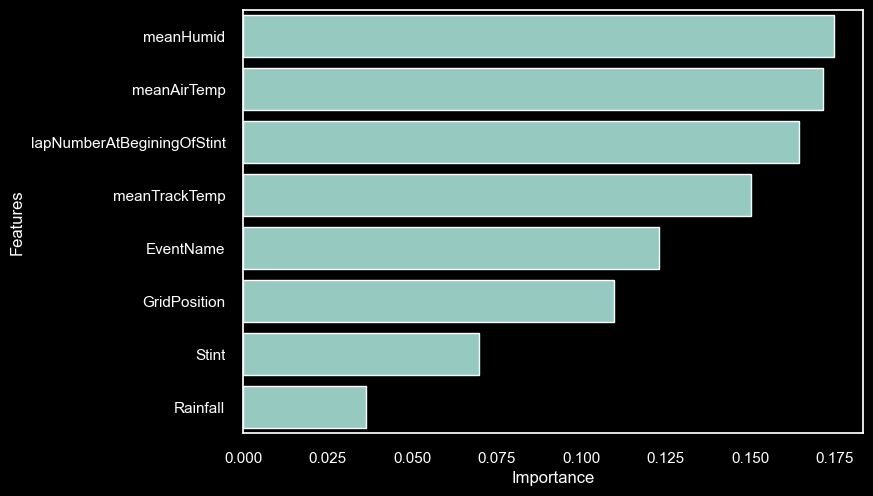

In [186]:
sns.barplot( x=feature_scores,y=feature_scores.index)
plt.style.use('dark_background')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

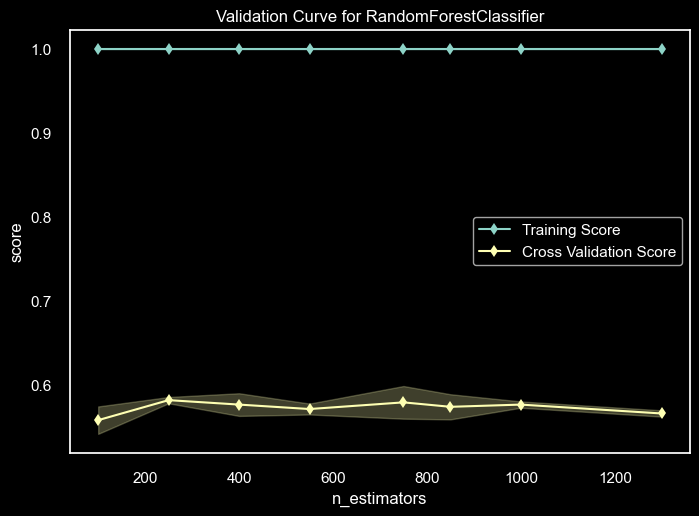

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='n_estimators',
                param_range=array([ 100,  250,  400,  550,  750,  850, 1000, 1300]),
                scoring='accuracy')


In [187]:
from yellowbrick.model_selection import validation_curve

n_est = [100,250,400,550,750,850,1000,1300]

print(validation_curve(RandomForestClassifier(), X=X_train, y=Y_train, param_name='n_estimators', param_range=n_est, scoring='accuracy', cv=3))

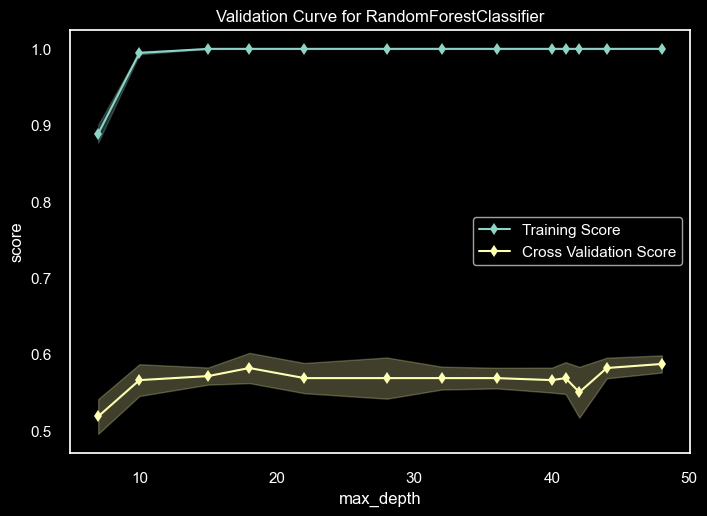

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='max_depth',
                param_range=array([ 7, 10, 15, 18, 22, 28, 32, 36, 40, 41, 42, 44, 48]),
                scoring='accuracy')


In [188]:
depth_vals = [7,10,15,18,22,28,32,36,40,41,42,44,48]

print(validation_curve(RandomForestClassifier(), X=X_train, y=Y_train, param_name='max_depth', param_range=depth_vals, scoring='accuracy', cv=3))

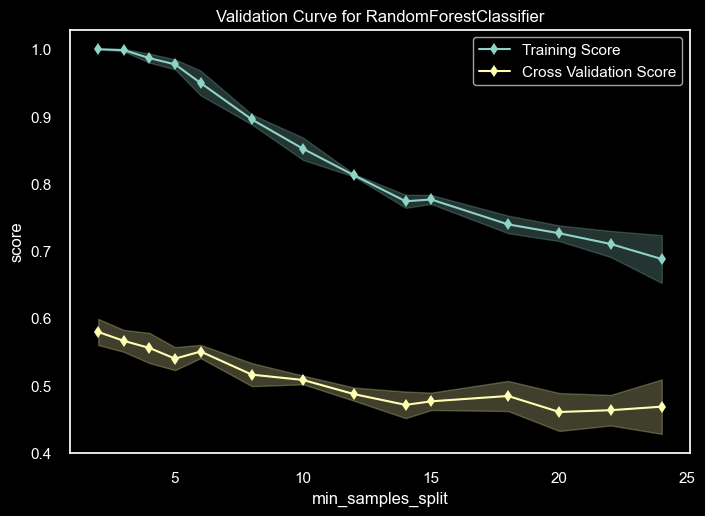

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='min_samples_split',
                param_range=array([ 1,  2,  3,  4,  5,  6,  8, 10, 12, 14, 15, 18, 20, 22, 24]),
                scoring='accuracy')


In [189]:
min_samples = [1,2,3,4,5,6,8,10,12,14,15,18,20,22,24]
plt.grid(False)
print(validation_curve(RandomForestClassifier(), X=X_train, y=Y_train, param_name='min_samples_split', param_range=min_samples, scoring='accuracy', cv=3))

In [224]:
model = RandomForestClassifier(n_estimators=750,max_depth=48,min_samples_split=2,random_state=0)
model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=48, n_estimators=750, random_state=0)

In [225]:
y_pred = model.predict(X_test)
print(y_pred)
print(f"Accuracy : {round(accuracy_score(y_pred,Y_test)*100,2)}%")

[3 4 2 3 3 3 5 3 2 2 2 1 2 1 2 3 2 1 2 2 1 2 2 5 1 2 2 8 2 4 2 1 2 2 1 3 4
 2 2 2 3 2 2 1 3 3 2 4 3 3 2 2 2 1 2 2 3 2 2 1 4 2 4 3 3 4 2 5 4 2 4 2 1 2
 6 1 3 5 3 2 3 3 1 1 1 1 3 2 2 1 3 3 2 3 5]
Accuracy : 64.21%


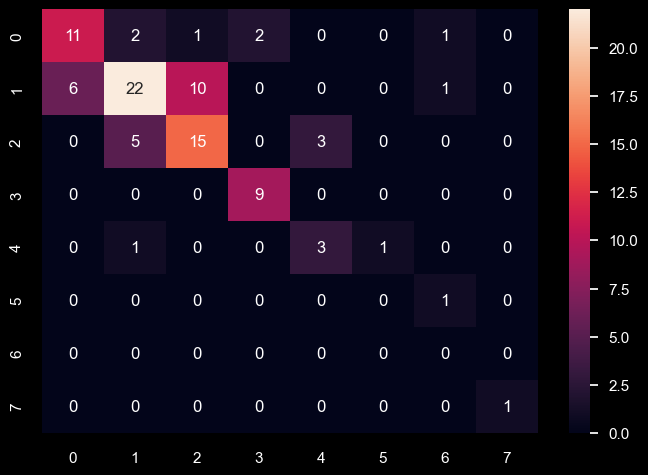

In [206]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_pred,Y_test)
sns.heatmap(conf,annot=True)
plt.show()

In [193]:
def EncodeTarget(res) :
    if res == 1:
        print('HARD') 
    elif res == 2:
        print('MEDIUM') 
    elif res == 3:
        print('SOFT') 
    elif res == 4:
        print('INTERMEDIATE')
    elif res == 5:
        print('SUPERSOFT')
    elif res == 6:
        print('ULTRASOFT')
    elif res == 7:
        print('HYPERSOFT')
    elif res == 8:
        print('WET')


In [194]:
row = int(12)
input = X.loc[row , : ].values
print(input)
EncodeTarget(Y[row])

[ 0.     1.    26.116 29.948 63.748  0.     2.     1.   ]
MEDIUM


In [217]:
pred = model.predict([[ 0.  ,   1.,    26.116 ,29.948, 63.748,  0.,     2.,     1.   ]])
EncodeTarget(pred[0])

MEDIUM


c:\Users\R.PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [196]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

scores = []
for k in range(1,4,8,12,16,20,24,26,28,19,3) :
    cross_val_score.fit(X_test,Y_test)
    sc = cross_val_score.skill(KNN,X_train,x_train,Y_Train)
    

TypeError: range expected at most 3 arguments, got 11

In [173]:
neighb.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=12, p=8)

In [174]:
y_pred = neighb.predict(X_test)
y_pred

array([3, 2, 2, 3, 2, 3, 1, 2, 2, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2,
       4, 2, 2, 2, 3, 4, 1, 4, 2, 2, 1, 2, 1, 3, 1, 2, 2, 2, 3, 3, 2, 3,
       2, 2, 2, 8, 3, 3, 1, 2, 1, 2, 1, 2, 3, 2, 1, 1, 2, 1, 4, 3, 3, 8,
       2, 2, 4, 2, 4, 2, 1, 2, 2, 1, 2, 2, 3, 2, 3, 1, 1, 1, 2, 1, 3, 1,
       2, 1, 2, 3, 2, 1, 1])

In [175]:
accuracy_score(y_pred,Y_test)

0.4631578947368421